In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
nepal = pd.read_csv("eq2015.csv")
fuente_1 = "https://www.kaggle.com/datasets/sanskarnegi/nepal-earthquake-2015"

In [5]:
nepal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Unnamed: 0                   762106 non-null  int64 
 1   building_id                  762106 non-null  int64 
 2   district_id                  762106 non-null  int64 
 3   vdcmun_id                    762106 non-null  int64 
 4   ward_id                      762106 non-null  int64 
 5   count_floors_pre_eq          762106 non-null  int64 
 6   count_floors_post_eq         762106 non-null  int64 
 7   age_building                 762106 non-null  int64 
 8   plinth_area_sq_ft            762106 non-null  int64 
 9   height_ft_pre_eq             762106 non-null  int64 
 10  height_ft_post_eq            762106 non-null  int64 
 11  land_surface_condition       762106 non-null  object
 12  foundation_type              762106 non-null  object
 13  roof_type     

In [ ]:
hipotesis_1 = "Los edificios antiguos son más susceptibles al derrumbamiento que los edificios modernos con técnicas de construcción actuales"

In [ ]:
nepal.groupby("damage_grade")["age_building"].value_counts()

damage_grade  age_building
Grade 1       1               7175
              5               5905
              3               5766
              2               5690
              10              5234
                              ... 
Grade 5       174                1
              175                1
              178                1
              185                1
              195                1
Name: count, Length: 690, dtype: int64

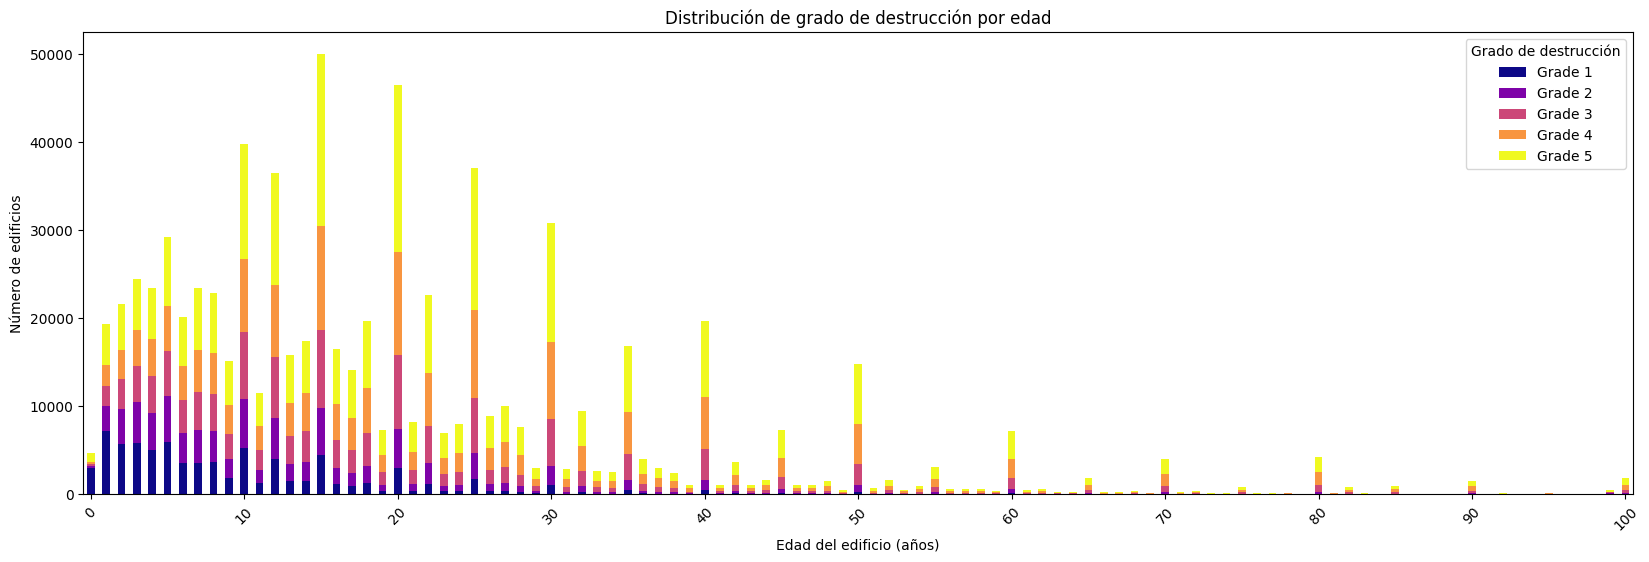

In [85]:
df_filtered = nepal[nepal['age_building'] <= 100]  # Filtra edificios con menos de 200 años
df_grouped_filtered = df_filtered.groupby(['age_building', 'damage_grade']).size().unstack()

ax = df_grouped_filtered.plot(kind='bar', stacked=True, figsize=(20, 6), colormap='plasma')

ticks = np.arange(0, df_filtered['age_building'].max() + 10, 10)  # Genera ticks cada 10 años
ax.set_xticks(ticks)  # Aplica los ticks al eje X
ax.set_xticklabels(ticks, rotation=45)  # Rota las etiquetas para mejor visibilidad

plt.xlabel('Edad del edificio (años)')
plt.ylabel('Número de edificios')
plt.title('Distribución de grado de destrucción por edad')
plt.legend(title='Grado de destrucción')
plt.show()

In [ ]:
hipotesis_2 = "Los edificios adosados son más propensos al derrumbamiento frente a los construidos de manera independiente"

In [9]:
nepal.groupby("damage_grade")["position"].value_counts()

damage_grade  position       
Grade 1       Not attached        62382
              Attached-1 side     10911
              Attached-2 side      5181
              Attached-3 side       341
Grade 2       Not attached        70467
              Attached-1 side     12470
              Attached-2 side      4069
              Attached-3 side       251
Grade 3       Not attached       110704
              Attached-1 side     20940
              Attached-2 side      4541
              Attached-3 side       227
Grade 4       Not attached       145803
              Attached-1 side     32178
              Attached-2 side      5571
              Attached-3 side       292
Grade 5       Not attached       215087
              Attached-1 side     52932
              Attached-2 side      7548
              Attached-3 side       199
Name: count, dtype: int64

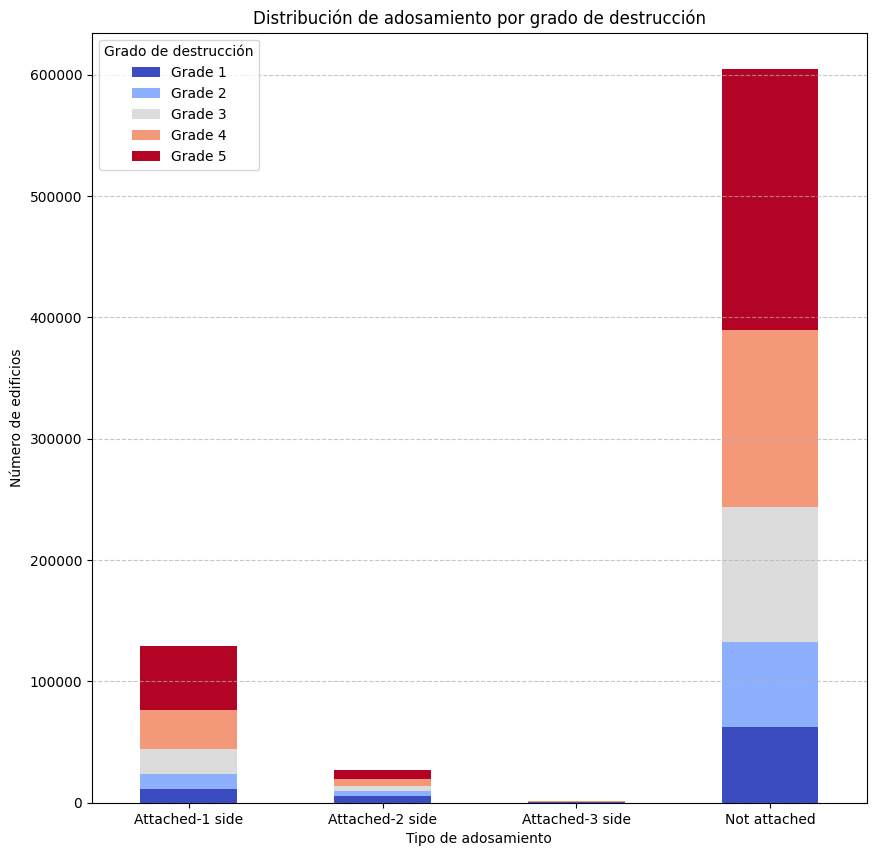

In [52]:
adosado = nepal.groupby(['position', 'damage_grade']).size().unstack()

# Crear el gráfico
adosado.plot(kind='bar', stacked=True, figsize=(10, 10), colormap='coolwarm')

# Etiquetas
plt.xlabel('Tipo de adosamiento')
plt.ylabel('Número de edificios')
plt.title('Distribución de adosamiento por grado de destrucción')
plt.legend(title='Grado de destrucción')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [63]:
df_filtered_ados = nepal[nepal['position'] == 'Attached-3 side']

In [64]:
adosado_3_lados = df_filtered_ados.groupby(['position', 'damage_grade']).size().unstack()

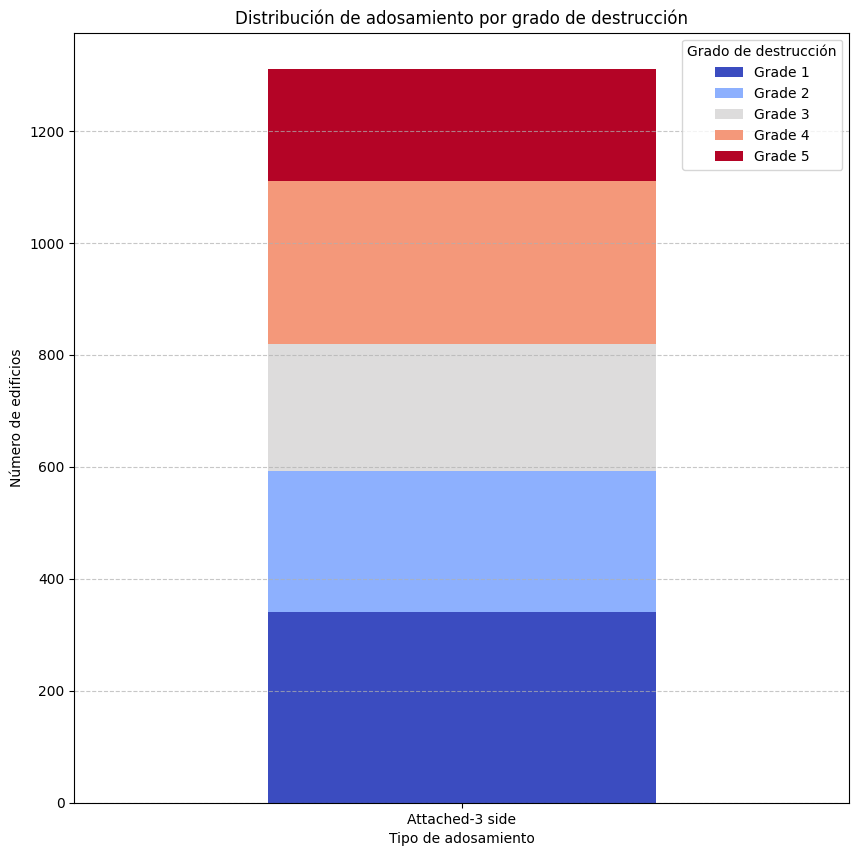

In [65]:
# Crear el gráfico
adosado_3_lados.plot(kind='bar', stacked=True, figsize=(10, 10), colormap='coolwarm')

# Etiquetas
plt.xlabel('Tipo de adosamiento')
plt.ylabel('Número de edificios')
plt.title('Distribución de adosamiento por grado de destrucción')
plt.legend(title='Grado de destrucción')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
hipotesis_3 = "Los edificios cuya planta principal fue construida con elementos rígidos (piedras,cemento...) son menos propensos al derrumbamiento frente a terremotos"

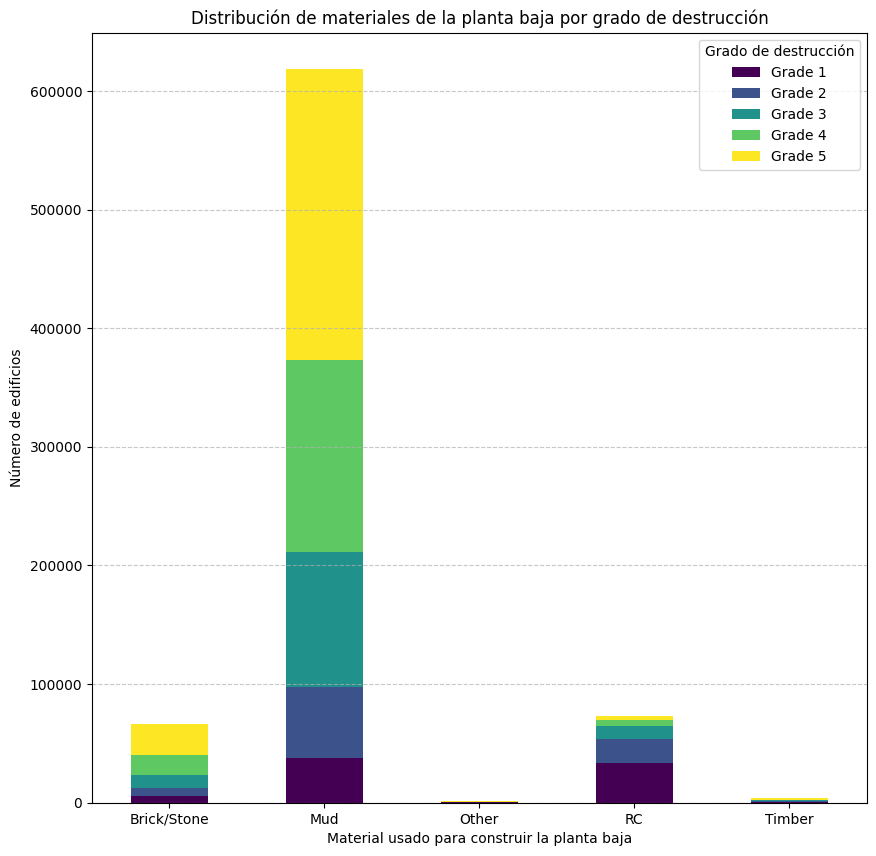

In [51]:
planta_baja = nepal.groupby(["ground_floor_type","damage_grade"]).size().unstack()

# Crear el gráfico
planta_baja.plot(kind='bar', stacked=True, figsize=(10, 10), colormap='viridis')

# Etiquetas
plt.xlabel('Material usado para construir la planta baja')
plt.ylabel('Número de edificios')
plt.title('Distribución de materiales de la planta baja por grado de destrucción')
plt.legend(title='Grado de destrucción')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [58]:
df_filtrado = nepal[nepal['ground_floor_type'].isin(['Other', 'Timber'])]

In [59]:
mas_materiales = df_filtrado.groupby(['ground_floor_type', 'damage_grade']).size().unstack()

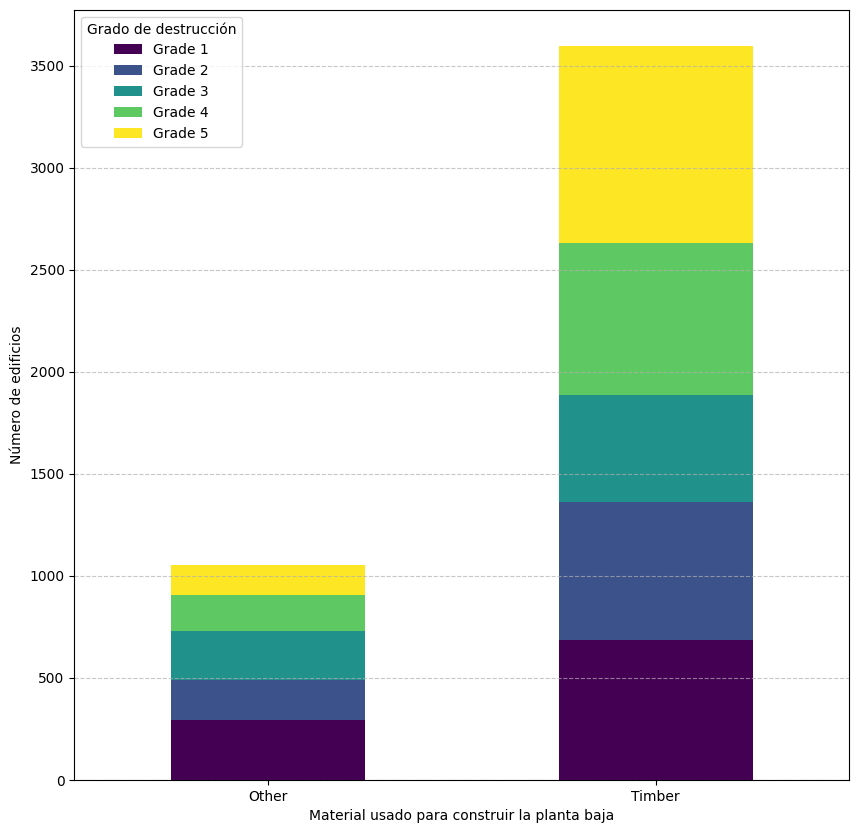

In [62]:
# Crear el gráfico
mas_materiales.plot(kind='bar', stacked=True, figsize=(10, 10), colormap='viridis')

# Etiquetas
plt.xlabel('Material usado para construir la planta baja')
plt.ylabel('Número de edificios')
plt.legend(title='Grado de destrucción')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
hipotesis_4 = "Los edificios de mayor altura son más propensos a derrumbarse durante grandes terremotos"

In [66]:
nepal.groupby("damage_grade")["count_floors_pre_eq"].value_counts()

damage_grade  count_floors_pre_eq
Grade 1       2                       37917
              1                       30774
              3                        6859
              4                        2238
              5                         811
              6                         171
              7                          36
              8                           5
              9                           4
Grade 2       2                       54233
              1                       21147
              3                       10271
              4                        1153
              5                         336
              6                          87
              7                          26
              8                           3
              9                           1
Grade 3       2                       93555
              3                       23613
              1                       18018
              4                         96

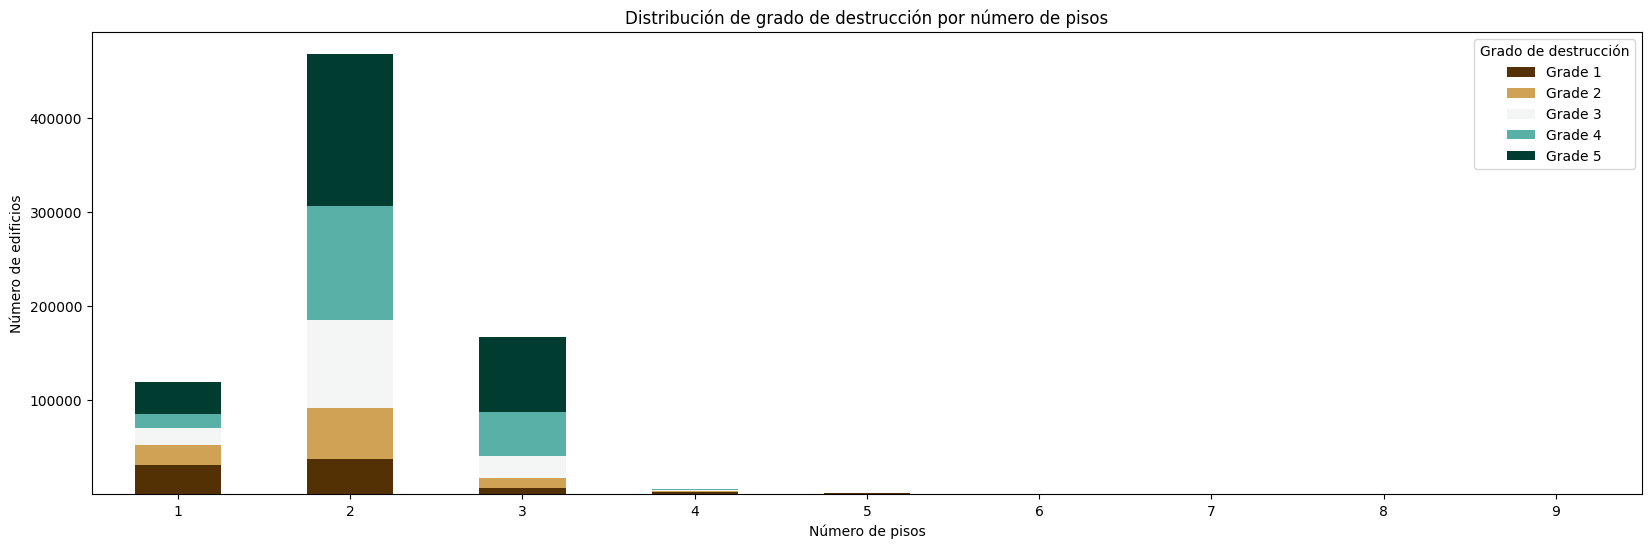

In [ ]:
df_agrupado = nepal.groupby(['count_floors_pre_eq', 'damage_grade']).size().unstack()

ax = df_agrupado.plot(kind='bar', stacked=True, figsize=(20, 6), colormap='BrBG')

plt.xlabel('Número de pisos')
plt.xticks(rotation=0)
plt.ylabel('Número de edificios')
plt.title("Distribución de grado de destrucción por número de pisos")
plt.legend(title='Grado de destrucción')
plt.show()

In [77]:
df_pisos = nepal[nepal['count_floors_pre_eq'].isin([4,5,6])]

In [78]:
mas_pisos = df_pisos.groupby(['count_floors_pre_eq', 'damage_grade']).size().unstack()

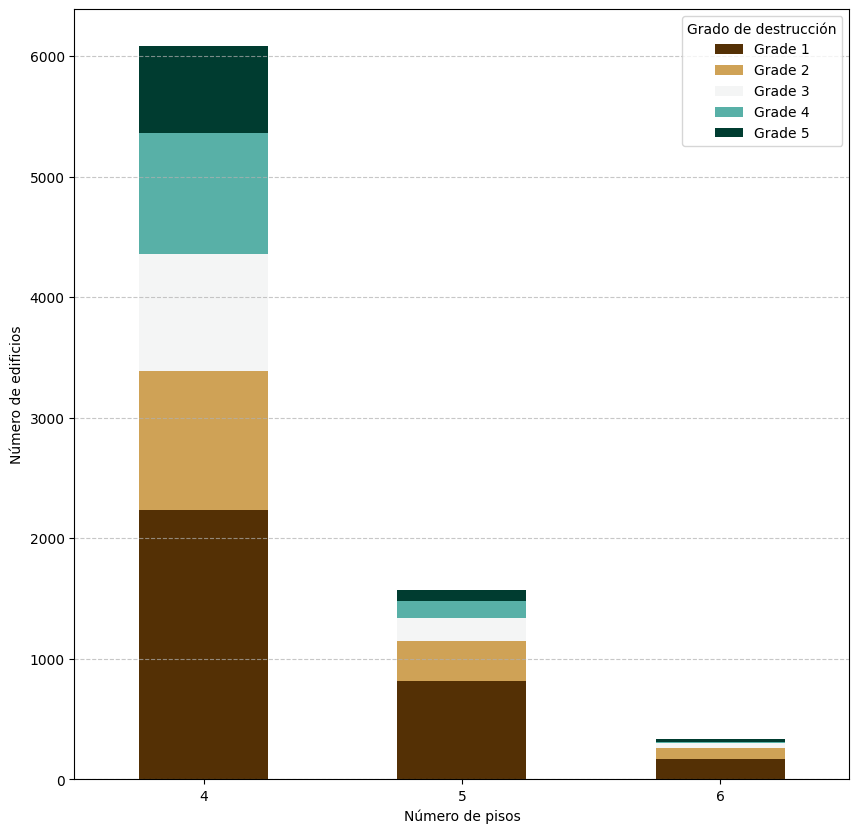

In [83]:
# Crear el gráfico
mas_pisos.plot(kind='bar', stacked=True, figsize=(10, 10), colormap='BrBG')

# Etiquetas
plt.xlabel('Número de pisos')
plt.ylabel('Número de edificios')
plt.legend(title='Grado de destrucción')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [80]:
df_pisos2 = nepal[nepal['count_floors_pre_eq'].isin([7,8,9])]

In [81]:
mas_pisos2 = df_pisos2.groupby(['count_floors_pre_eq', 'damage_grade']).size().unstack()

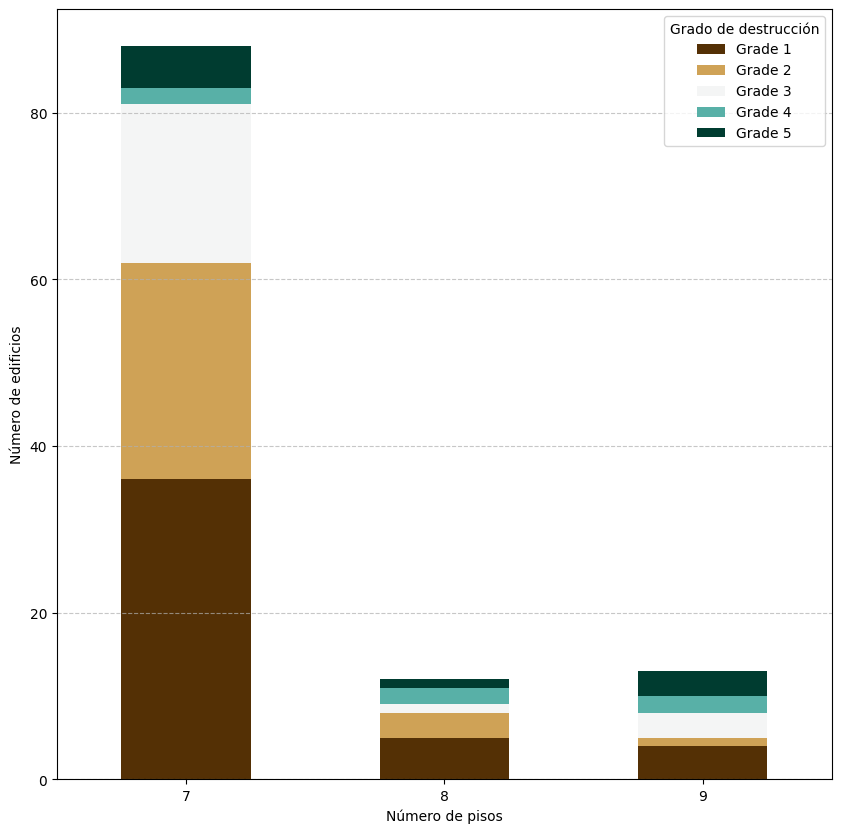

In [84]:
# Crear el gráfico
mas_pisos2.plot(kind='bar', stacked=True, figsize=(10, 10), colormap='BrBG')

# Etiquetas
plt.xlabel('Número de pisos')
plt.ylabel('Número de edificios')
plt.legend(title='Grado de destrucción')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()